In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install tensorflow

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Files/Dataset.csv")
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [5]:
df.shape

(91713, 186)

In [6]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [7]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [9]:
df.groupby('hospital_death').mean()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,,
0,65666.975501,65480.459629,105.693501,61.748741,29.264902,0.194873,169.706029,508.287716,0.787357,0.0,...,0.062882,0.024799,0.000818,0.014188,0.227215,0.011639,0.024012,0.006301,0.003763,0.018409
1,64961.356412,66137.129754,105.412634,68.494156,28.340398,0.065824,168.952094,509.098547,1.348287,0.0,...,0.334838,0.242726,0.001277,0.031673,0.203704,0.027331,0.049042,0.015198,0.008046,0.044317


<Axes: xlabel='hospital_death', ylabel='count'>

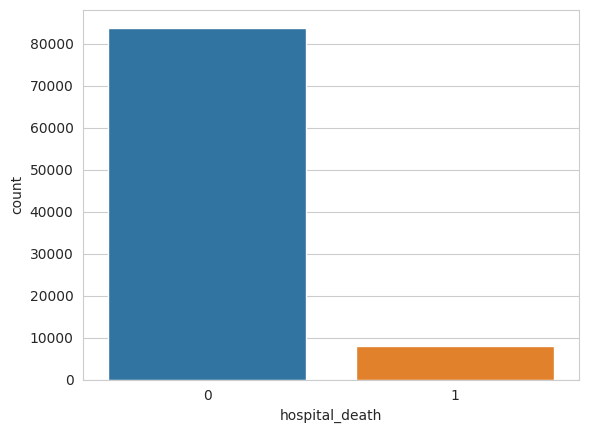

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='hospital_death',data=df)

In [11]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [12]:
cols = df.select_dtypes([np.number]).columns
cols

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=178)

<Axes: xlabel='hospital_death', ylabel='Density'>

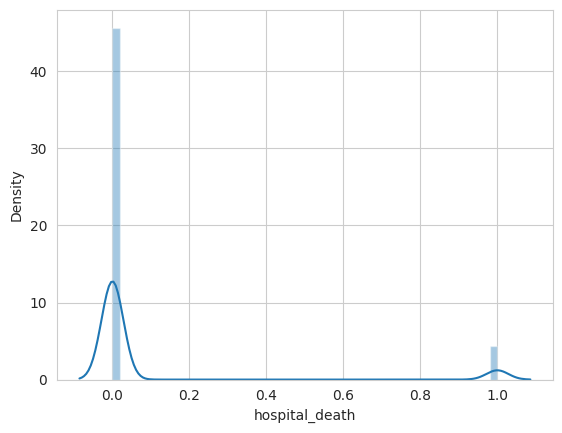

In [13]:
sns.distplot(df['hospital_death'])

In [14]:
df[cols] = df[cols].fillna(df[cols].mean())

In [15]:
df[cols]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.000000,22.730000,0,180.3,92,0.541667,...,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.0,90,0.927778,...,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.7,93,0.000694,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.1,92,0.000694,...,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,29.185818,0,188.0,91,0.073611,...,0.086787,0.043955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.000000,23.060250,0,177.8,927,0.298611,...,0.120000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,0,56.000000,47.179671,0,183.0,925,0.120139,...,0.030000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,0,48.000000,27.236914,0,170.2,908,0.046528,...,0.050000,0.020000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,0,62.309516,23.297481,0,154.9,922,0.081944,...,0.070000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
for i in object_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i)

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [17]:
df.isnull().any().sum()

0

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
#
# Encode labels of multiple columns at once
#
df[object_columns] = df[object_columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,0,19.0,29.185818,0,2,1,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7


In [19]:
X = df.drop(columns='hospital_death', axis=1)
Y = df['hospital_death']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(91713, 185) (82541, 185) (9172, 185)


In [22]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.00000000e+00, 0.00000000e+00, 5.32171872e-03, 8.49262081e-03,
       9.10660305e-04, 6.78397378e-03, 1.43476141e-02, 1.18411603e-02,
       3.49566425e-06, 1.13843326e-02, 8.36312513e-03, 6.98875991e-03,
       2.03049877e-03, 5.99671121e-03, 3.18405212e-03, 0.00000000e+00,
       1.31785743e-03, 1.49879312e-02, 3.51827622e-02, 3.98262689e-02,
       4.85666026e-03, 0.00000000e+00, 9.30223673e-03, 1.79364915e-02,
       1.77392255e-02, 3.29295135e-02, 3.88718932e-02, 4.15138448e-02,
       1.20670323e-03, 3.25372206e-02, 8.03853184e-03, 1.41738503e-02,
       3.82040623e-03, 1.25775488e-02, 1.68489512e-02, 2.47211381e-02,
       2.48397403e-02, 2.43669883e-02, 3.39014495e-02, 6.40537652e-03,
       5.91830652e-03, 2.10274040e-02, 1.38676005e-02, 2.84786954e-02,
       1.08360057e-02, 1.21095104e-02, 1.55486158e-02, 4.19184316e-03,
       1.80635309e-02, 2.53420046e-03, 1.92178716e-02, 1.35320072e-02,
       1.35608718e-02, 1.69718605e-02, 1.92331913e-02, 2.88900590e-03,
      

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

apache_4a_hospital_death_prob    0.074769
apache_4a_icu_death_prob         0.073520
d1_lactate_min                   0.045525
gcs_motor_apache                 0.041514
apache_3j_diagnosis              0.039826
                                   ...   
height                           0.000003
patient_id                       0.000000
readmission_status               0.000000
arf_apache                       0.000000
encounter_id                     0.000000
Length: 185, dtype: float64

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['apache_3j_diagnosis', 'gcs_motor_apache', 'd1_lactate_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'],
      dtype='object')

In [26]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

In [27]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [28]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
import tensorflow as tf
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [32]:
history = model.fit(X_train_std, Y_train, epochs=50, validation_split=0.1,batch_size=10)

Epoch 1/50
7429/7429 [==============================] - 24s 3ms/step - loss: 0.2292 - accuracy: 0.9198 - precision: 0.5881 - recall: 0.2659 - val_loss: 0.2200 - val_accuracy: 0.9198 - val_precision: 0.5738 - val_recall: 0.2881
Epoch 2/50
7429/7429 [==============================] - 20s 3ms/step - loss: 0.2147 - accuracy: 0.9235 - precision: 0.6649 - recall: 0.2478 - val_loss: 0.2192 - val_accuracy: 0.9198 - val_precision: 0.5722 - val_recall: 0.2937
Epoch 3/50
7429/7429 [==============================] - 21s 3ms/step - loss: 0.2139 - accuracy: 0.9238 - precision: 0.6726 - recall: 0.2449 - val_loss: 0.2164 - val_accuracy: 0.9230 - val_precision: 0.6639 - val_recall: 0.2238
Epoch 4/50
7429/7429 [==============================] - 21s 3ms/step - loss: 0.2135 - accuracy: 0.9238 - precision: 0.6761 - recall: 0.2424 - val_loss: 0.2165 - val_accuracy: 0.9213 - val_precision: 0.6038 - val_recall: 0.2643
Epoch 5/50
7429/7429 [==============================] - 20s 3ms/step - loss: 0.2130 - accura

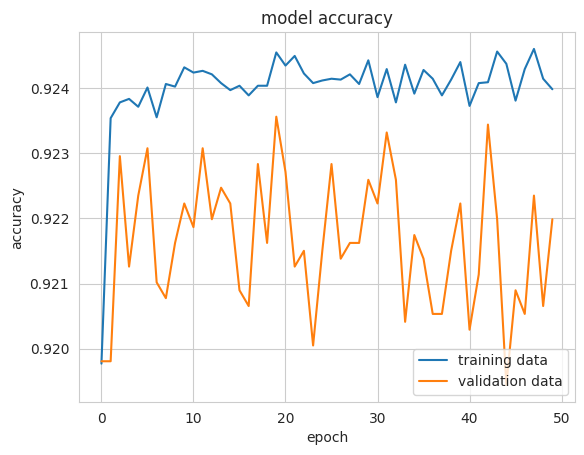

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

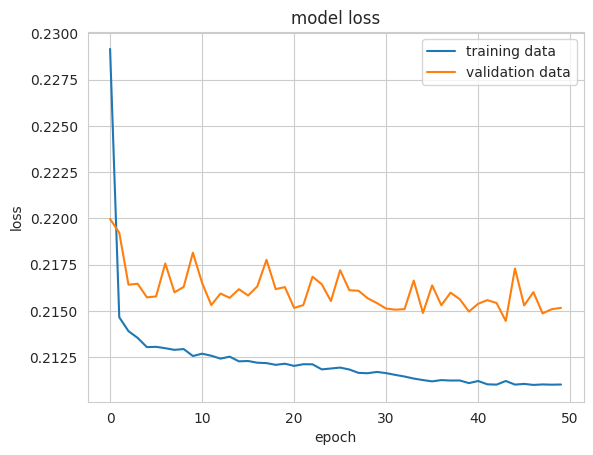

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [43]:
#saving the model
model.save('keras_model.h5')

In [45]:
#loading the model
from keras.models import load_model
model = load_model('keras_model.h5')